In [72]:
import talib

pip install pandas-datareader

### Future price respects
- Gold: GC=F
- Silver: SI=F
- Crude Oil (Brent): BZ=F
- Crude Oil (WTI): CL=F
- Natural Gas: NG=F
- Copper: HG=F
- Platinum: PL=F
- Palladium: PA=F
- Corn: ZC=F
- Wheat: ZW=F

In [67]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import yfinance as yf
import datetime

# commodity_symbol = "GC=F"  # Gold symbol
# start_date = "2023-01-01"
# end_date = "2023-06-27"


# data = yf.download(commodity_symbol, start=start_date, end=end_date)
# print(data.tail(10))

In [68]:
# matplotlib rebuild
import matplotlib as mpl


# mpl.font_manager._rebuild()

# matplotlib 환경 설정
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'Malgun Gothic' # window
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [69]:
com_list = ['GC=F','SI=F','CL=F','BZ=F','NG=F','HG=F','ZC=F','ZW=F']
commodity_symbol = "GC=F"  # Gold symbol
start_date = "2023-01-01"
end_date = "2023-06-27"

for com in com_list:
    data = yf.download(com_list, start=start_date, end=end_date)['Close']
print(data.tail(10))

[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
                 BZ=F       CL=F         GC=F    HG=F   NG=F       SI=F  \
Date                                                                      
2023-06-12  71.839996  67.120003  1955.300049  3.7505  2.266  23.985001   
2023-06-13  74.290001  69.419998  1944.599976  3.8285  2.340  23.756001   
2023-06-14  73.199997  68.269997  1955.300049  3.8660  2.342  24.044001   
2023-06-15  75.669998  70.620003  1957.800049  3.8965  2.533  23.891001  

In [7]:
data['Close'].tail(90)

,BZ=F,CL=F,GC=F,HG=F,NG=F,SI=F,ZC=F,ZW=F
Date,,,,,,,,
2023-02-15,85.379997,78.589996,1834.199951,4.0520,2.471,21.546000,676.25,769.25
2023-02-16,85.139999,78.489998,1842.000000,4.1655,2.389,21.684000,676.00,765.00
2023-02-17,83.000000,76.339996,1840.400024,4.1140,2.275,21.694000,677.75,765.50
2023-02-21,83.050003,76.160004,1833.000000,4.2345,2.073,21.868999,680.50,750.50
2023-02-22,80.599998,73.949997,1832.000000,4.2025,2.174,21.660999,674.00,736.50
...,...,...,...,...,...,...,...,...
2023-06-20,75.900002,70.500000,1935.500000,3.8785,2.492,23.193001,643.75,695.75
2023-06-21,77.120003,72.529999,1933.300049,3.9110,2.597,22.774000,671.00,734.50
2023-06-22,74.139999,69.510002,1912.699951,3.8885,2.608,22.436001,660.50,739.00


<Axes: xlabel='Date'>

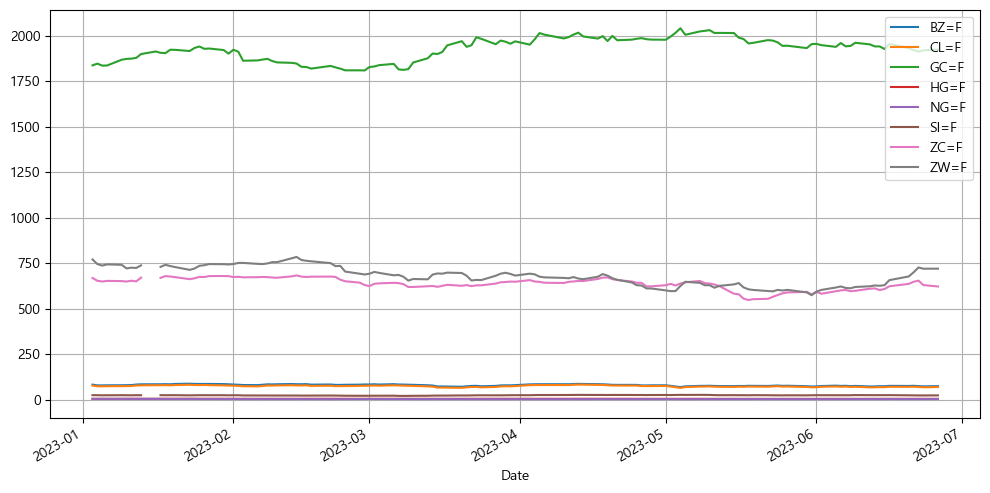

In [15]:
data.plot()
# df[['LG화학', '삼성전자']].plot(secondary_y=['LG화학']) 보조축 만들기

### GOLD 

In [60]:
gold = "GC=F"  # Gold symbol
start_date = "2023-01-01"
end_date = "2023-06-27"
df1 = yf.download(gold, start=start_date, end=end_date)
print(df1.tail(10))
df1['Range'] = (df1['High'] - df1['Low']) * 0.5  #0.5를 k값으로 가정 
# target(매수가), range(1일치) 컬럼을 한칸씩 밑으로 내림(.shift(1))
df1['Target'] = df1['Open'] + df1['Range'].shift(1)
# print(df1.head(10))

### 수익률 ror

#ror(수익률), np.where(조건문, 참일때 값, 거짓일때 값)
df1['Ror'] = np.where(df1['High'] > df1['Target'],
                     df1['Close'] / df1['Target'], #- fee,
                     1)

df1.tail()

### 기간 누적수익률 / MDD

#누적 곱 계산(cumprod) -> 누적수익률
df1['hpr'] = df1['Ror'].cumprod()
# Draw Down 계산 (누적 최대 값과 현재 hpr 차이 / 누적 최대값 *100)
df1['dd'] = (df1['hpr'].cummax() - df1['hpr']) / df1['hpr'].cummax() * 100
#MDD 계산
print("MDD(%): ", df1['dd'].max())
print("누적수익률(%):", df1['hpr'])

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-06-12  1959.699951  1963.500000  1951.400024  1955.300049  1955.300049   
2023-06-13  1960.599976  1967.500000  1940.300049  1944.599976  1944.599976   
2023-06-14  1946.199951  1958.199951  1940.300049  1955.300049  1955.300049   
2023-06-15  1941.699951  1958.800049  1926.000000  1957.800049  1957.800049   
2023-06-16  1961.400024  1962.900024  1953.500000  1958.400024  1958.400024   
2023-06-20  1958.599976  1958.599976  1931.300049  1935.500000  1935.500000   
2023-06-21  1935.599976  1936.800049  1920.000000  1933.300049  1933.300049   
2023-06-22  1920.000000  1921.000000  1912.099976  1912.699951  1912.699951   
2023-06-23  1918.699951  1932.500000  1918.699951  1919.099976  1919.099976   
2023-06-26  1922.900024  1928.500000  1922.500000  1923.699951

### Crude

In [62]:
cl = "CL=F"  # Crude 
start_date = "2023-01-01"
end_date = "2023-06-27"
df2 = yf.download(cl, start=start_date, end=end_date)
print(df2.tail(10))
df2['Range'] = (df2['High'] - df2['Low']) * 0.5  #0.5를 k값으로 가정 
# target(매수가), range(1일치) 컬럼을 한칸씩 밑으로 내림(.shift(1))
df2['Target'] = df2['Open'] + df2['Range'].shift(1)
# print(df1.head(10))

### 수익률 ror

#ror(수익률), np.where(조건문, 참일때 값, 거짓일때 값)
df2['Ror'] = np.where(df2['High'] > df2['Target'],
                     df2['Close'] / df2['Target'], #- fee,
                     1)

df2.tail()

### 기간 누적수익률 / MDD

#누적 곱 계산(cumprod) -> 누적수익률
df2['hpr'] = df2['Ror'].cumprod()
# Draw Down 계산 (누적 최대 값과 현재 hpr 차이 / 누적 최대값 *100)
df2['dd'] = (df2['hpr'].cummax() - df2['hpr']) / df2['hpr'].cummax() * 100
#MDD 계산
print("MDD(%): ", df2['dd'].max())
print("누적수익률(%):", df2['hpr'])

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2023-06-12  70.269997  70.330002  66.800003  67.120003  67.120003  404769
2023-06-13  67.309998  69.830002  67.150002  69.419998  69.419998  366354
2023-06-14  69.349998  70.489998  68.070000  68.269997  68.269997  304449
2023-06-15  68.699997  70.959999  67.970001  70.620003  70.620003  115613
2023-06-16  70.550003  71.889999  69.949997  71.779999  71.779999   99185
2023-06-20  71.449997  72.089996  69.650002  70.500000  70.500000  430492
2023-06-21  70.900002  72.720001  70.800003  72.529999  72.529999  264656
2023-06-22  72.430000  72.650002  68.930000  69.510002  69.510002  421348
2023-06-23  69.529999  69.650002  67.349998  69.160004  69.160004  322475
2023-06-26  69.839996  70.110001  68.709999  69.370003  69.370003  280116
MDD(%):  13.67294802086061
누적수익률(%): Date
2

### Corn

In [64]:
corn = "ZC=F"  # Crude 
start_date = "2023-01-01"
end_date = "2023-06-27"
df3 = yf.download(corn, start=start_date, end=end_date)
print(df3.tail(10))
df3['Range'] = (df3['High'] - df3['Low']) * 0.5  #0.5를 k값으로 가정 
# target(매수가), range(1일치) 컬럼을 한칸씩 밑으로 내림(.shift(1))
df3['Target'] = df3['Open'] + df3['Range'].shift(1)
# print(df1.head(10))

### 수익률 ror

#ror(수익률), np.where(조건문, 참일때 값, 거짓일때 값)
df3['Ror'] = np.where(df3['High'] > df3['Target'],
                     df3['Close'] / df3['Target'], #- fee,
                     1)

df3.tail()

### 기간 누적수익률 / MDD

#누적 곱 계산(cumprod) -> 누적수익률
df3['hpr'] = df3['Ror'].cumprod()
# Draw Down 계산 (누적 최대 값과 현재 hpr 차이 / 누적 최대값 *100)
df3['dd'] = (df3['hpr'].cummax() - df3['hpr']) / df2['hpr'].cummax() * 100
#MDD 계산
print("MDD(%): ", df3['dd'].max())
print("누적수익률(%):", df3['hpr'])

[*********************100%***********************]  1 of 1 completed
              Open    High     Low   Close  Adj Close  Volume
Date                                                         
2023-06-12  609.00  623.75  608.75  617.25     617.25  208159
2023-06-13  617.00  625.00  610.75  612.50     612.50  202991
2023-06-14  610.25  618.75  601.50  607.75     607.75  187535
2023-06-15  608.00  626.50  607.25  623.25     623.25  194030
2023-06-16  623.00  641.00  622.25  640.25     640.25  223694
2023-06-20  640.75  647.00  635.50  643.75     643.75  151986
2023-06-21  650.00  672.50  647.25  671.00     671.00  150762
2023-06-22  668.25  670.25  653.00  660.50     660.50  117760
2023-06-23  655.75  657.50  629.00  630.75     630.75  142972
2023-06-26  634.50  649.75  621.00  637.25     637.25  117529
MDD(%):  7.9351589685253705
누적수익률(%): Date
2023-01-03    1.000000
2023-01-04    1.000000
2023-01-05    1.000000
2023-01-06    0.993355
2023-01-09    0.993355
                ...   
2023-0

## 데이터 정규화 

<Axes: xlabel='Date'>

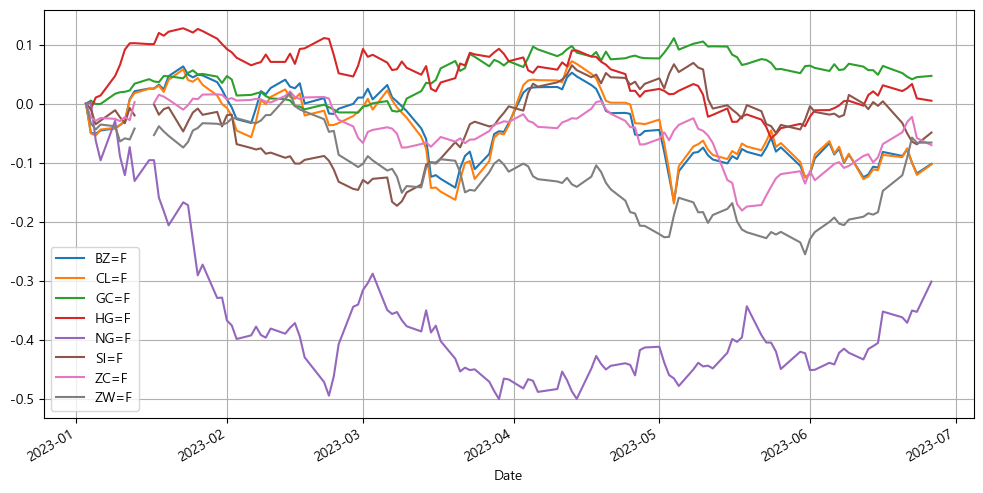

In [65]:
data_norm = data / data.iloc[0] - 1
data_norm.plot()

In [66]:
data_norm.iloc[-1].sort_values(ascending=False)

GC=F    0.046999
HG=F    0.004918
SI=F   -0.048999
ZW=F   -0.065930
ZC=F   -0.070359
BZ=F   -0.101993
CL=F   -0.103003
NG=F   -0.301489
Name: 2023-06-26 00:00:00, dtype: float64

## 회귀분석

In [28]:
from sklearn.linear_model import LinearRegression #sklearn 싸이킷런에서 회귀모델을 가져오겠다.
import numpy as np
import pandas as pd

In [37]:
X = data.iloc[:,:1].values # USD/JPY
y = data.iloc[:,:-1].values # USD/GBP
X,y
len(X), len(y)
X.shape, y.shape

((121, 1), (121, 7))

In [51]:
np.nan_to_num(y, nan = np.nanmean(y))  # numpy ndarray의 결측값 평균으로 처리

array([[8.17699966e+01, 7.65999985e+01, 1.83619995e+03, 3.76149988e+00,
        3.89400005e+00, 2.39799995e+01, 6.68000000e+02],
       [7.77200012e+01, 7.27300034e+01, 1.84559998e+03, 3.72749996e+00,
        3.90000010e+00, 2.37500000e+01, 6.52500000e+02],
       [7.76100006e+01, 7.24599991e+01, 1.83480005e+03, 3.80049992e+00,
        3.65100002e+00, 2.31450005e+01, 6.48500000e+02],
       [7.80500031e+01, 7.32399979e+01, 1.83530005e+03, 3.81349993e+00,
        3.51999998e+00, 2.32900009e+01, 6.51750000e+02],
       [7.83399963e+01, 7.34700012e+01, 1.86700000e+03, 3.93849993e+00,
        3.78099990e+00, 2.37119999e+01, 6.50750000e+02],
       [7.88099976e+01, 7.38399963e+01, 1.87159998e+03, 4.00850010e+00,
        3.54600000e+00, 2.34249992e+01, 6.48250000e+02],
       [7.93000031e+01, 7.43099976e+01, 1.87309998e+03, 4.10599995e+00,
        3.42199993e+00, 2.31849995e+01, 6.52750000e+02],
       [8.23799973e+01, 7.70999985e+01, 1.87719995e+03, 4.14599991e+00,
        3.60700011e+00, 2

In [52]:
y

array([[8.17699966e+01, 7.65999985e+01, 1.83619995e+03, 3.76149988e+00,
        3.89400005e+00, 2.39799995e+01, 6.68000000e+02],
       [7.77200012e+01, 7.27300034e+01, 1.84559998e+03, 3.72749996e+00,
        3.90000010e+00, 2.37500000e+01, 6.52500000e+02],
       [7.76100006e+01, 7.24599991e+01, 1.83480005e+03, 3.80049992e+00,
        3.65100002e+00, 2.31450005e+01, 6.48500000e+02],
       [7.80500031e+01, 7.32399979e+01, 1.83530005e+03, 3.81349993e+00,
        3.51999998e+00, 2.32900009e+01, 6.51750000e+02],
       [7.83399963e+01, 7.34700012e+01, 1.86700000e+03, 3.93849993e+00,
        3.78099990e+00, 2.37119999e+01, 6.50750000e+02],
       [7.88099976e+01, 7.38399963e+01, 1.87159998e+03, 4.00850010e+00,
        3.54600000e+00, 2.34249992e+01, 6.48250000e+02],
       [7.93000031e+01, 7.43099976e+01, 1.87309998e+03, 4.10599995e+00,
        3.42199993e+00, 2.31849995e+01, 6.52750000e+02],
       [8.23799973e+01, 7.70999985e+01, 1.87719995e+03, 4.14599991e+00,
        3.60700011e+00, 2

In [53]:
reg = LinearRegression() # 객체 생성
reg.fit(X,y) # fit이 학습모델 -> 학습하면서 모델생성

ValueError: Input y contains NaN.

In [36]:
y

array([[8.17699966e+01, 7.65999985e+01, 1.83619995e+03, 3.76149988e+00,
        3.89400005e+00, 2.39799995e+01, 6.68000000e+02],
       [7.77200012e+01, 7.27300034e+01, 1.84559998e+03, 3.72749996e+00,
        3.90000010e+00, 2.37500000e+01, 6.52500000e+02],
       [7.76100006e+01, 7.24599991e+01, 1.83480005e+03, 3.80049992e+00,
        3.65100002e+00, 2.31450005e+01, 6.48500000e+02],
       [7.80500031e+01, 7.32399979e+01, 1.83530005e+03, 3.81349993e+00,
        3.51999998e+00, 2.32900009e+01, 6.51750000e+02],
       [7.83399963e+01, 7.34700012e+01, 1.86700000e+03, 3.93849993e+00,
        3.78099990e+00, 2.37119999e+01, 6.50750000e+02],
       [7.88099976e+01, 7.38399963e+01, 1.87159998e+03, 4.00850010e+00,
        3.54600000e+00, 2.34249992e+01, 6.48250000e+02],
       [7.93000031e+01, 7.43099976e+01, 1.87309998e+03, 4.10599995e+00,
        3.42199993e+00, 2.31849995e+01, 6.52750000e+02],
       [8.23799973e+01, 7.70999985e+01, 1.87719995e+03, 4.14599991e+00,
        3.60700011e+00, 2

### K value

In [10]:
com_list = ['GC=F','SI=F','CL=F','BZ=F','NG=F','HG=F','ZC=F','ZW=F']
commodity_symbol = "GC=F"  # Gold symbol
start_date = "2023-01-01"
end_date = "2023-06-27"

for com in com_list:
    data = yf.download(com_list, start=start_date, end=end_date)['High']
print(data.tail(10))

[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
                 BZ=F       CL=F         GC=F    HG=F   NG=F       SI=F  \
Date                                                                      
2023-06-12  74.879997  70.330002  1963.500000  3.7685  2.324  24.285000   
2023-06-13  74.650002  69.830002  1967.500000  3.8570  2.370  23.756001   
2023-06-14  75.480003  70.489998  1958.199951  3.8660  2.390  24.044001   
2023-06-15  75.959999  70.959999  1958.800049  3.8965  2.568  23.891001  

In [11]:
com_list = ['GC=F','SI=F','CL=F','BZ=F','NG=F','HG=F','ZC=F','ZW=F']
commodity_symbol = "GC=F"  # Gold symbol
start_date = "2023-01-01"
end_date = "2023-06-27"

for com in com_list:
    data = yf.download(com_list, start=start_date, end=end_date)['Low']
print(data.tail(10))

[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
                 BZ=F       CL=F         GC=F    HG=F   NG=F       SI=F  \
Date                                                                      
2023-06-12  71.570000  66.800003  1951.400024  3.7485  2.206  23.985001   
2023-06-13  71.949997  67.150002  1940.300049  3.8160  2.275  23.756001   
2023-06-14  73.029999  68.070000  1940.300049  3.8400  2.294  24.044001   
2023-06-15  72.910004  67.970001  1926.000000  3.8125  2.315  23.891001  

In [12]:
data.cols = data['High','Low']
data.tail()

KeyError: ('High', 'Low')